In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d
import os,sys
sys.path.append('/Users/ajc/Core/PyScript')
import readdata as rd
import seaborn as sns

In [3]:
path_root='/Users/ajc/FUSE/simulations/production/streams/'
path = path_root

In [4]:
dir_name=['SIM_17']
path = [os.path.join(path_root,d) for d in dir_name]

sim_no =  500
SimNBGC = [os.path.join(path[0],'LE1_NBGC_dx%sm_min250m'%sim_no), os.path.join(path[0],'ME1_NBGC_dx%sm_min250m'%sim_no),
            os.path.join(path[0],'HE1_NBGC_dx%sm_min250m'%sim_no)]
SimBGC = [os.path.join(path[0],'LE1_BGC_dx%sm_min250m'%sim_no), os.path.join(path[0],'ME1_BGC_dx%sm_min250m'%sim_no),
            os.path.join(path[0],'HE1_BGC_dx%sm_min250m'%sim_no)]

print (path)

['/Users/ajc/FUSE/simulations/production/streams/SIM_17']


In [5]:
Simulations = np.concatenate([SimNBGC, SimBGC])
Colors = ['r','k','b','g','gray']
Sim_dis = ['noBGC_LE', 'noBGC_ME', 'noBGC_HE', 'BGC_LE', 'BGC_ME', 'BGC_HE']
Simulations

array(['/Users/ajc/FUSE/simulations/production/streams/SIM_17/LE1_NBGC_dx500m_min250m',
       '/Users/ajc/FUSE/simulations/production/streams/SIM_17/ME1_NBGC_dx500m_min250m',
       '/Users/ajc/FUSE/simulations/production/streams/SIM_17/HE1_NBGC_dx500m_min250m',
       '/Users/ajc/FUSE/simulations/production/streams/SIM_17/LE1_BGC_dx500m_min250m',
       '/Users/ajc/FUSE/simulations/production/streams/SIM_17/ME1_BGC_dx500m_min250m',
       '/Users/ajc/FUSE/simulations/production/streams/SIM_17/HE1_BGC_dx500m_min250m'],
      dtype='<U77')

In [6]:
components = [(1,'DOC'), (3,'N'),(2,'O2')]
marks = ['solid','dashed', 'dotted', 'dashdot',':']
comp_names = ['DOC', 'N', 'DO']

In [7]:
surf_files = ['surface_outlet_stream_1_2.dat']

surf_loc = ['loc_1_2', 'loc_111_112', 'loc_198_199',
              'loc_221_222', 'loc_24_44',  'loc_260_262','loc_74_75']

In [9]:
#%matplotlib qt
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/PR/SIM_17/BTC/'
yLims = [[0, 800], [0,200], [0,400], [0,200], [0,200], [26000,27000]]

to_micro = 1e+6
def get_discharge_fromfile(comp=0):
    fig, axs = plt.subplots(1,3, figsize=(8,3), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1,1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)
    plt.tight_layout()
    axs = axs.ravel()
    
    for i,sim in enumerate(Simulations):

        for j,Tc in enumerate(components):
            infile = os.path.join(sim,surf_files[comp])
            
            time = np.loadtxt(infile,usecols=0,skiprows=11)/(86400.)
            data = np.loadtxt(infile,usecols=Tc[0],skiprows=11)
            l = int(min(len(data), len(time)))
            if 'NBGC' in sim:
                axs[j].plot(time,1e-3*data*to_micro,color=Colors[i], linestyle=marks[0], label = Sim_dis[i],linewidth=1.)
            else:
                axs[j].plot(time,1e-3*data*to_micro,color=Colors[i-3], linestyle=marks[1], label = Sim_dis[i], linewidth=1.)

            axs[j].set_xlabel('Time [d]', fontsize=12,fontweight='normal')
            
            axs[j].set_ylim(yLims[j][0],yLims[j][1])
            axs[j].set_title(comp_names[j])
            axs[j].ticklabel_format(axis="y", style="sci", scilimits=(0,0),useMathText=True)
            
            if j ==0:
                axs[j].legend(loc='center right',fontsize=5)
                axs[j].set_ylabel('Concentration [$\mu$M]', fontsize=12,fontweight='normal')
    axs[0].set_yticks(np.arange(0,801,200))
    axs[1].set_yticks(np.arange(0,201,100))
    axs[2].set_yticks(np.arange(0,401,100))
    plt.tight_layout()
    plt.savefig(outfile + 'BTC_LE1_ME1_HE1_dx%sm_min250m_%s-A1.png'%(sim_no, surf_loc[comp]),dpi=200)


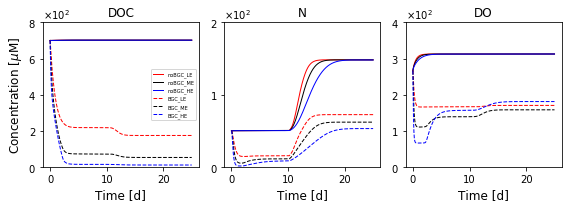

In [10]:
get_discharge_fromfile(comp=0)